# Import All Dependencies

In [1]:
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
#from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf
from PIL import Image
import os

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Download Dataset from Kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"widyaameliaputri","key":"30f88046fb169144a893461a5404021d"}'}

In [3]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d widyaameliaputri/indonesian-traditional-cakes

 99% 322M/326M [00:01<00:00, 209MB/s]
100% 326M/326M [00:01<00:00, 251MB/s]


In [5]:
!unzip -qq /content/indonesian-traditional-cakes.zip

#Define Function For Load The Model

In [6]:
def load_model():
  model_path = '/content/drive/Shareddrives/Capstone Project/Machine Learning/Model-90-90-90/saved_model'
  model = tf.saved_model.load(model_path)
  return model

#Define Function For Prediction Image

In [14]:
def cake_prediction(file_path):
  img = image.load_img(file_path) 
  x = image.img_to_array(img)
  x = x/255.0
  x = tf.image.resize(x, (150, 150))
  x = np.expand_dims(x, axis=0)

  cake_class = ['ape', 'bika ambon', 'cenil', 'dadar gulung', 'gethuk lindri', 'kastengel', 'klepon', 'lapis', 'lemper', 'lumpur', 'nagasari', 'pastel', 'putri salju', 'putu ayu', 'risoles', 'serabi']
  model = load_model()
  pred = model(x)
  index = np.argmax(pred)
  pred_cake = cake_class[index]
  plt.imshow(img)
  plt.show()

  return pred_cake

#Prediction The Image

The image to be predicted is the fifteenth image in each cake folder in the test directory.

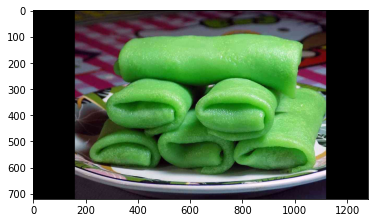

The prediction result from the picture above is dadar gulung. The actual name of this cake image is dadar gulung.


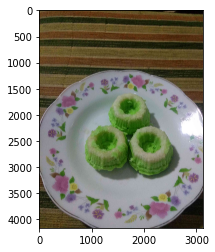

The prediction result from the picture above is putu ayu. The actual name of this cake image is putu ayu.


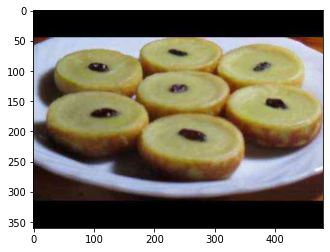

The prediction result from the picture above is lumpur. The actual name of this cake image is lumpur.


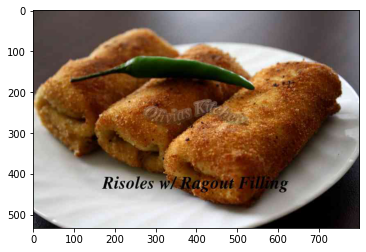

The prediction result from the picture above is risoles. The actual name of this cake image is risoles.


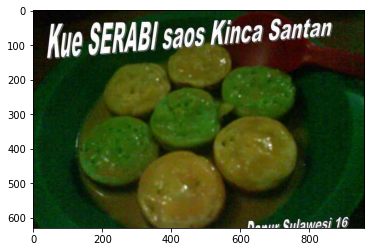

The prediction result from the picture above is serabi. The actual name of this cake image is serabi.


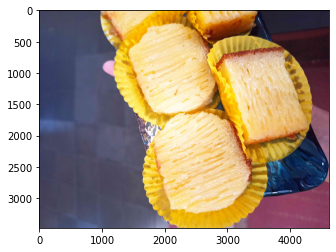

The prediction result from the picture above is bika ambon. The actual name of this cake image is bika ambon.


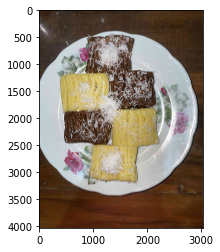

The prediction result from the picture above is gethuk lindri. The actual name of this cake image is gethuk lindri.


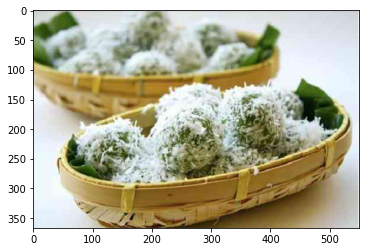

The prediction result from the picture above is klepon. The actual name of this cake image is klepon.


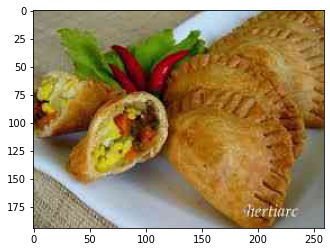

The prediction result from the picture above is pastel. The actual name of this cake image is pastel.


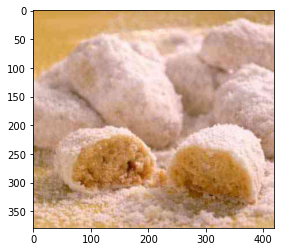

The prediction result from the picture above is putri salju. The actual name of this cake image is putri salju.


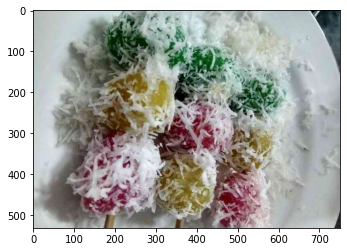

The prediction result from the picture above is cenil. The actual name of this cake image is cenil.


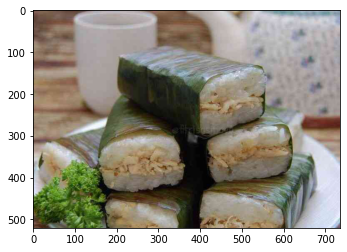

The prediction result from the picture above is lemper. The actual name of this cake image is lemper.


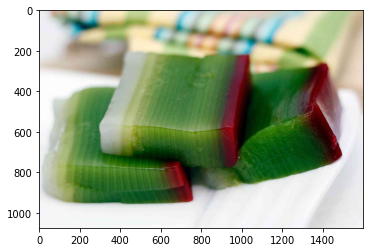

The prediction result from the picture above is lapis. The actual name of this cake image is lapis.


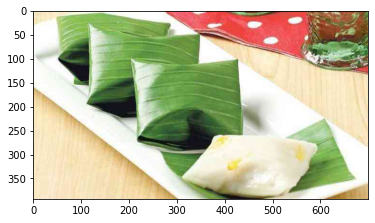

The prediction result from the picture above is nagasari. The actual name of this cake image is nagasari.


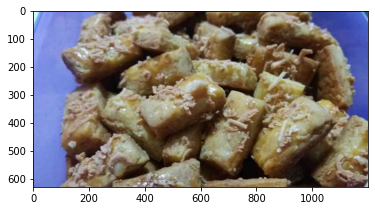

The prediction result from the picture above is kastengel. The actual name of this cake image is kastengel.


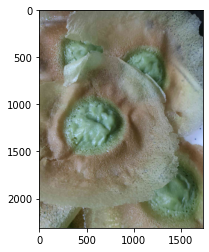

The prediction result from the picture above is ape. The actual name of this cake image is ape.

From 16 images, there are 16 that are predicted to be correct


In [38]:
test_dir = "/content/Dataset/test/"
cakes_name = ['dadar gulung', 'putu ayu', 'lumpur', 'risoles', 'serabi', 'bika ambon', 'gethuk lindri', 'klepon', 'pastel', 'putri salju', 'cenil', 'lemper', 'lapis', 'nagasari', 'kastengel', 'ape']
i = 0
n = 0
for cake in os.listdir(test_dir):
  cake_actual_name = cakes_name[i]
  cake_path = os.path.join(test_dir, cake)
  image_path = os.path.join(cake_path, os.listdir(cake_path)[14])
  pred_cake = cake_prediction(image_path)
  print("The prediction result from the picture above is {}. The actual name of this cake image is {}." .format(pred_cake, cake_actual_name))
  if pred_cake == cake_actual_name:
    n += 1
  i += 1
print("\nFrom 16 images, there are {} that are predicted to be correct".format(n))